In [2]:
import os
import numpy as np
import datetime
from matplotlib import pyplot as plt

# import the Obspy modules that we will use in this exercise
import obspy
from obspy.clients.fdsn import Client
from obspy.taup import TauPyModel
from obspy.geodetics import locations2degrees

%matplotlib inline


In [3]:
def plot_waveforms(st, starttime=None, endtime=None, ylim=40e-2):
  fig, ax = plt.subplots(len(st),1,sharex=True,sharey=True,squeeze=False,figsize=(10,12))

  for ista in range(len(st)):
    station = st[ista].stats.station
    channel = st[ista].stats.channel
    
    ax[ista][0].plot(st[ista].times("matplotlib"), st[ista].data*1e3, "k-", linewidth=0.5)
    ax[ista][0].xaxis_date()

    if starttime is None:
      starttime_lim = st[ista].stats.starttime.datetime
    else:
      starttime_lim = starttime
    if endtime is None:
      endtime_lim = st[ista].stats.endtime.datetime
    else:
      endtime_lim = endtime

    ax[ista][0].set_xlim([starttime_lim, endtime_lim])
    ax[ista][0].set_ylim([-ylim,ylim])
    ax[ista][0].set_title(station + '.' + channel)
    ax[ista][0].set_ylabel('V (mm/s)')

  fig.autofmt_xdate()

In [84]:
st[0].stats

         network: IU
         station: KIP
        location: 00
         channel: BH1
       starttime: 2018-01-01T00:00:00.019538Z
         endtime: 2018-01-02T00:00:00.019538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 30858, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 15799296})

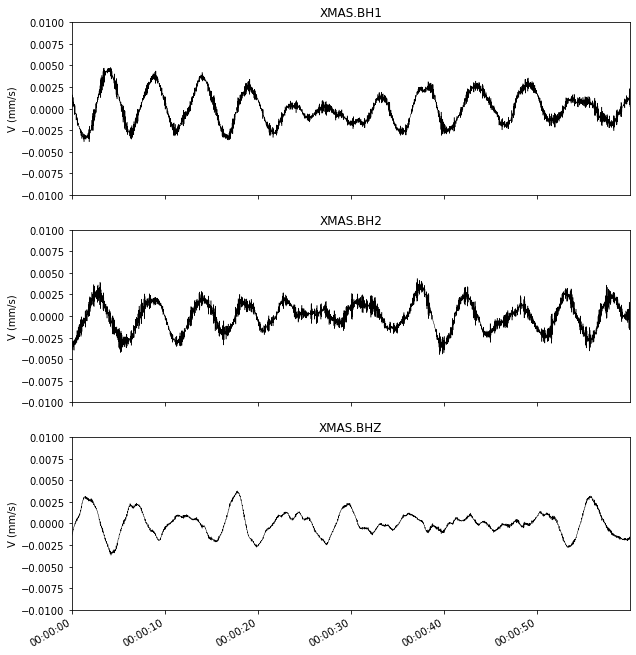

In [4]:
%matplotlib inline
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*XMAS*.mseed')
starttime = st[0].stats.starttime.datetime
endtime = (st[0].stats.starttime + 60).datetime
plot_waveforms(st, starttime=starttime, endtime=endtime, ylim=1e-2)


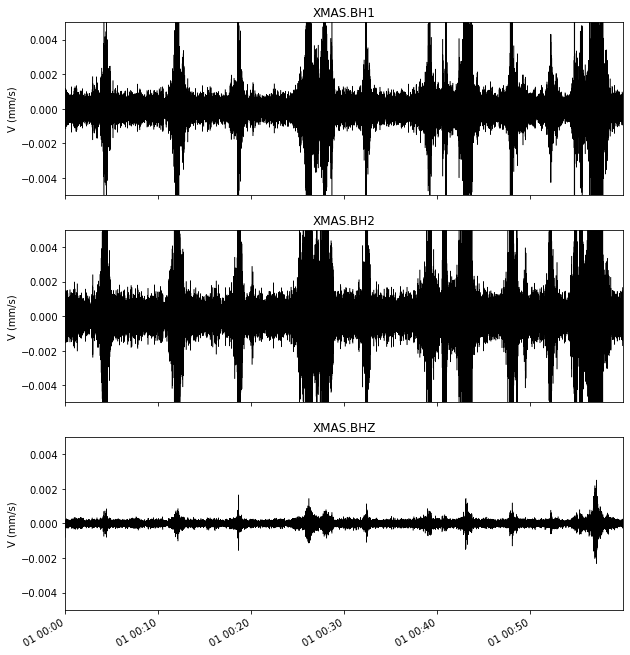

In [90]:
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*XMAS*.mseed')
st_filt = st.filter('highpass', freq=2, corners=2, zerophase=True)
starttime = st[0].stats.starttime.datetime
endtime = (st[0].stats.starttime + 3600).datetime
plot_waveforms(st_filt, starttime=starttime, endtime=endtime, ylim=0.5e-2)

3 Trace(s) in Stream:
IU.KIP.00.BH1 | 2018-01-01T00:00:00.019538Z - 2018-01-02T00:00:00.019538Z | 20.0 Hz, 1728001 samples
IU.KIP.00.BH2 | 2018-01-01T00:00:00.019538Z - 2018-01-02T00:00:00.019538Z | 20.0 Hz, 1728001 samples
IU.KIP.00.BHZ | 2018-01-01T00:00:00.019538Z - 2018-01-02T00:00:00.019538Z | 20.0 Hz, 1728001 samples


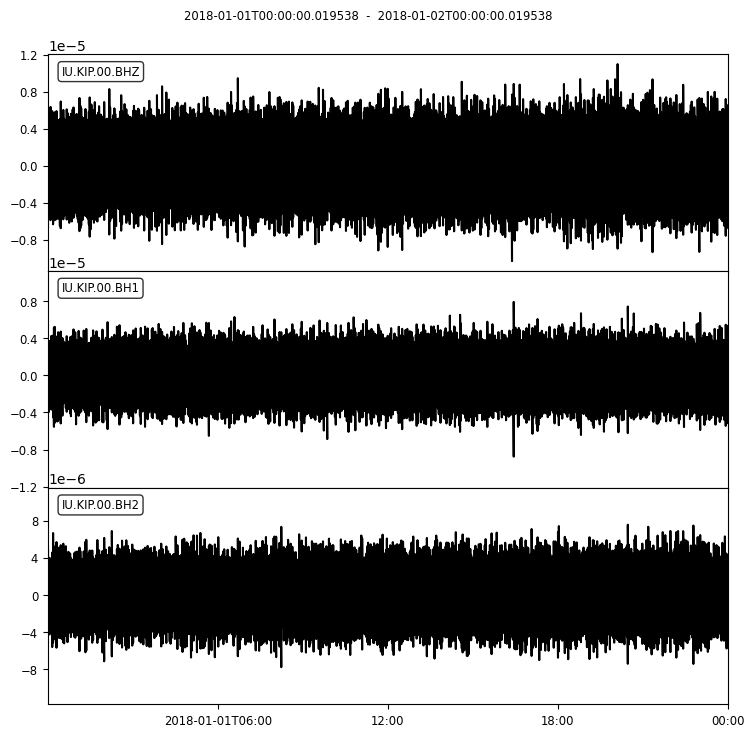

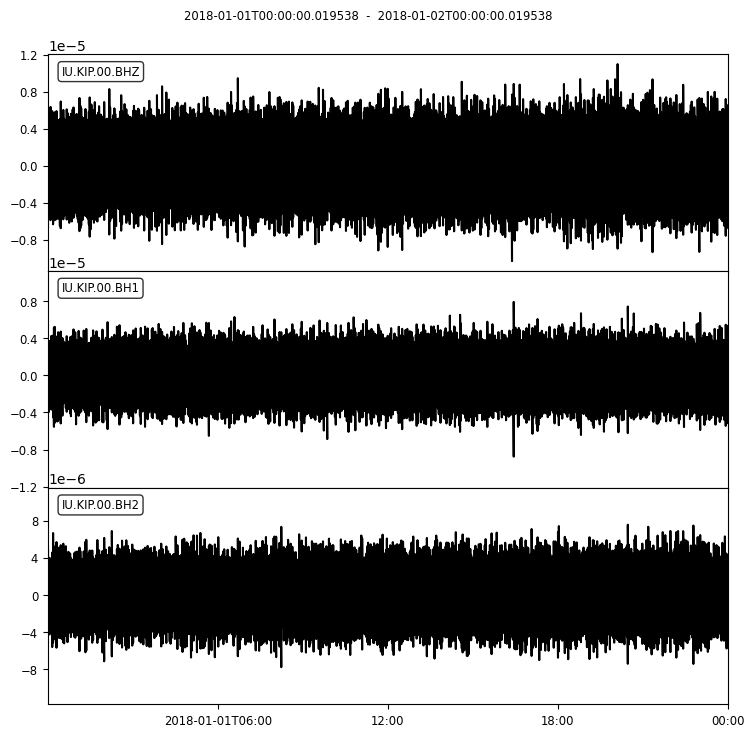

In [54]:
#%%
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*KIP*.mseed')
print(st)
st.plot()



3 Trace(s) in Stream:
IU.POHA.00.BH1 | 2018-01-01T00:00:00.019538Z - 2018-01-02T00:00:00.019538Z | 20.0 Hz, 1728001 samples
IU.POHA.00.BH2 | 2018-01-01T00:00:00.019539Z - 2018-01-02T00:00:00.019539Z | 20.0 Hz, 1728001 samples
IU.POHA.00.BHZ | 2018-01-01T00:00:00.019539Z - 2018-01-02T00:00:00.019539Z | 20.0 Hz, 1728001 samples


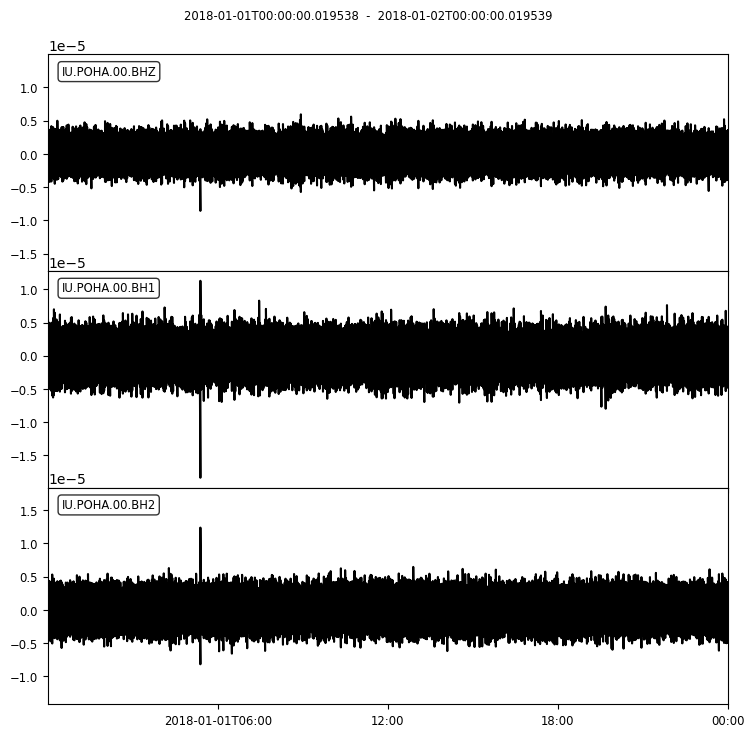

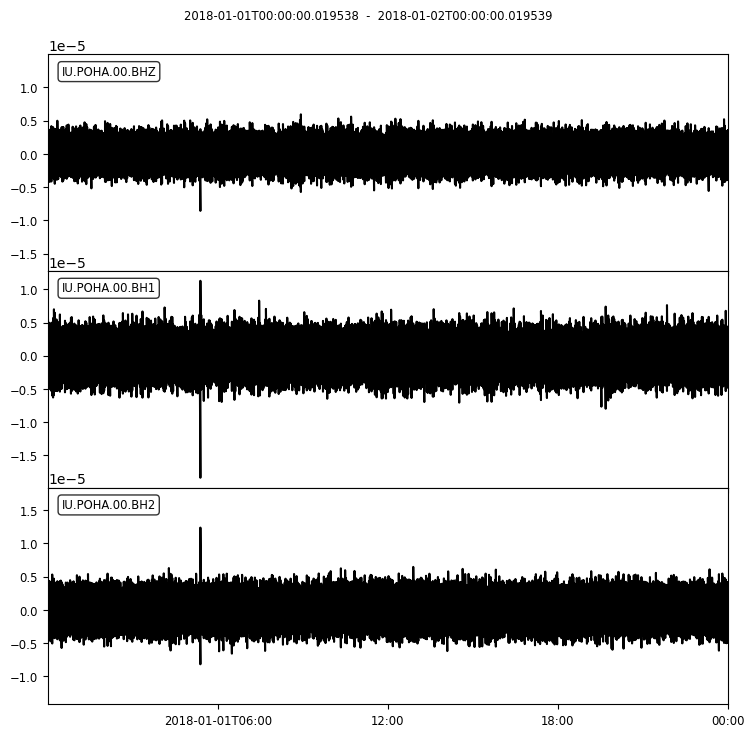

In [57]:
#%%
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*POHA*.mseed')
print(st)
st.plot()

3 Trace(s) in Stream:
IU.XMAS.00.BH1 | 2017-12-31T23:59:59.994538Z - 2018-01-01T23:59:59.994538Z | 40.0 Hz, 3456001 samples
IU.XMAS.00.BH2 | 2017-12-31T23:59:59.994538Z - 2018-01-01T23:59:59.994538Z | 40.0 Hz, 3456001 samples
IU.XMAS.00.BHZ | 2017-12-31T23:59:59.994538Z - 2018-01-01T23:59:59.994538Z | 40.0 Hz, 3456001 samples


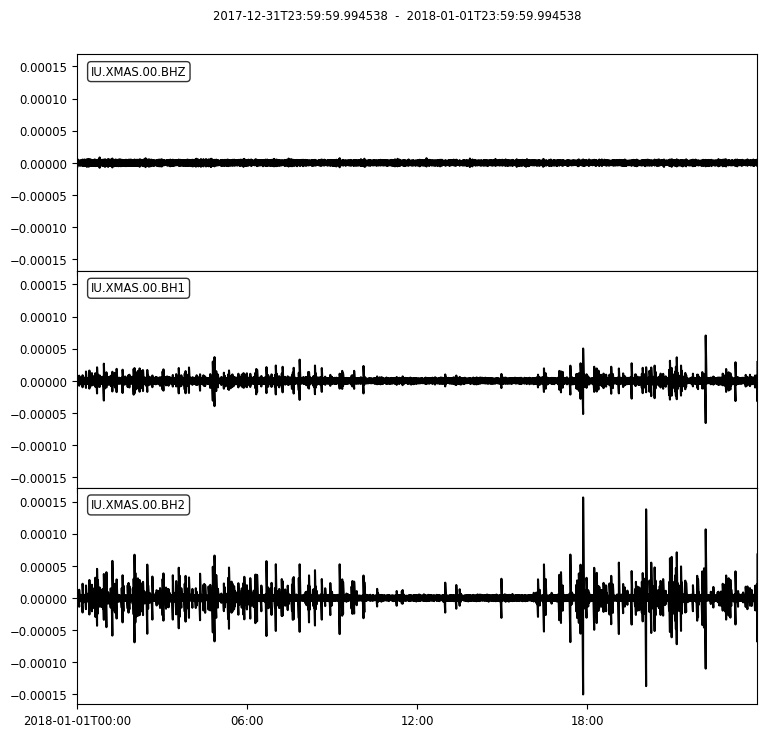

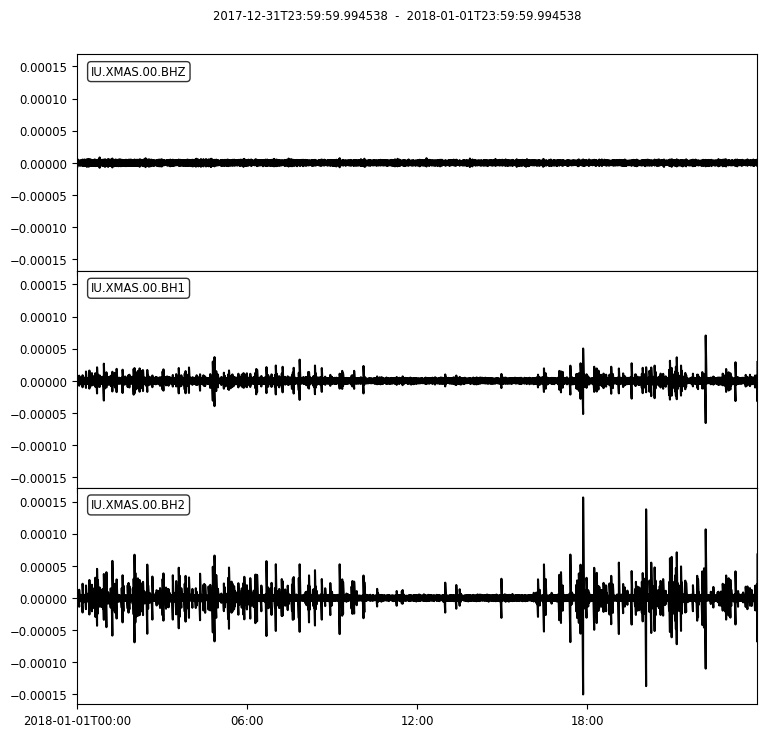

In [58]:
#%%
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*XMAS*.mseed')
print(st)
st.plot()

In [5]:
#%%
st = obspy.read(working_dir + '/*XMAS*BH1*.mseed')
st_filt = st.copy()
st_filt.filter('highpass', freq=6, corners=2, zerophase=True)
st_filt.plot(type='dayplot', interval=60,linewidth=0.2,size=(1000,1500),data_unit='m/s')



Exception: No file matching file pattern: /Users/Yin9xun/Work/island_stations/data/*XMAS*BH1*.mseed

In [61]:
st.plot?

In [ ]:
#%%
st.spectrogram(log=True)


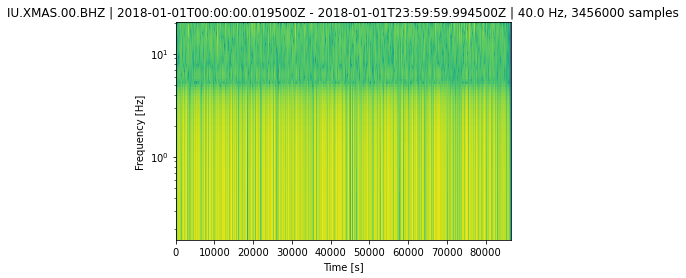

[None]

In [4]:
#%%
st_filt.spectrogram(log=True,dbscale=True,clip=[0, 0.9])

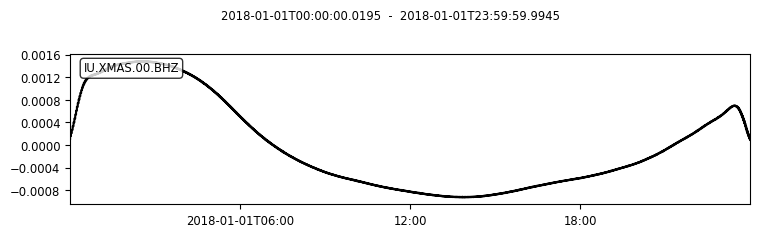

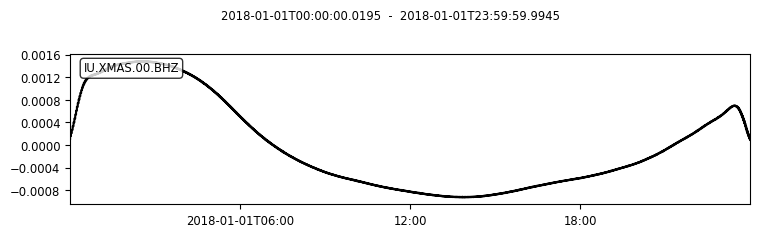

In [7]:
%matplotlib inline
st.plot()

1 Trace(s) in Stream:
IU.POHA.00.BHZ | 2018-01-01T00:00:00.019500Z - 2018-01-01T23:59:59.969500Z | 20.0 Hz, 1728000 samples


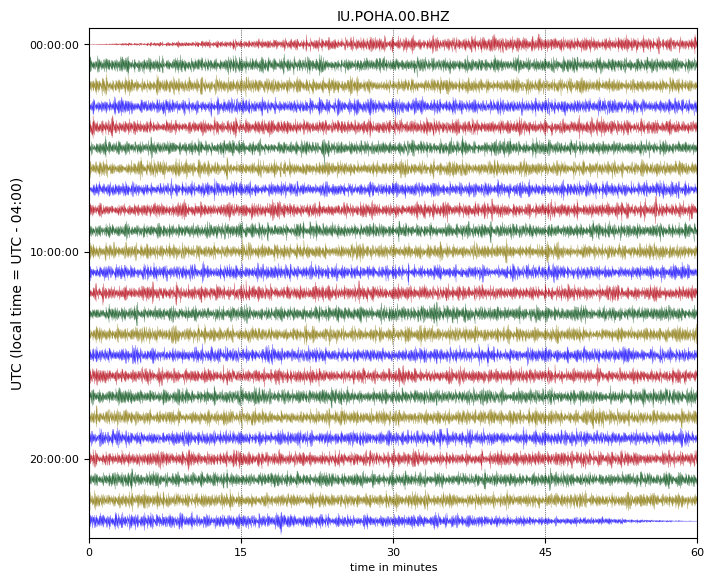

In [4]:
working_dir = '/Users/Yin9xun/Work/island_stations/data'
st = obspy.read(working_dir + '/*POHA*.mseed')
st.detrend("spline", order=3, dspline=1000)
print(st)
st.plot(type='dayplot', interval=60,linewidth=0.2)
plt.show()

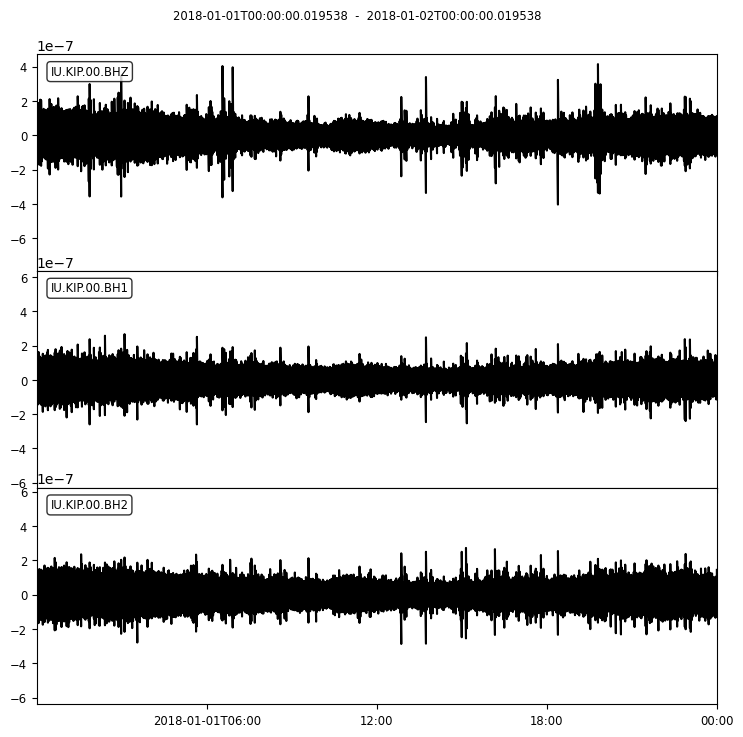

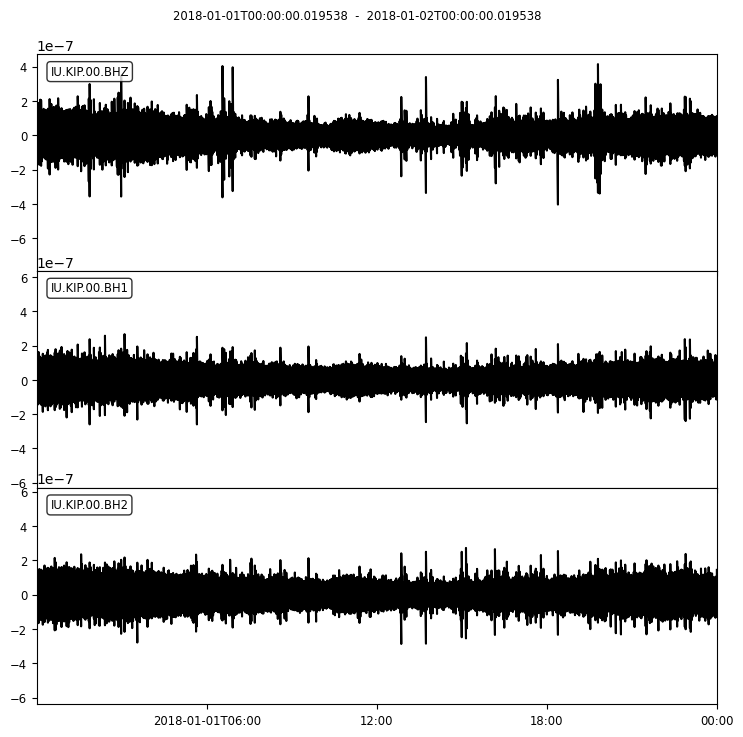

In [56]:
st_filt = st.copy()
st_filt.filter('highpass', freq=2, corners=2, zerophase=True)
st_filt.plot()
#st_filt.plot(type='dayplot', interval=60,linewidth=0.2,size=(1000,1500))

In [35]:
dt = obspy.UTCDateTime('2018-01-01T04:00:00.019500Z')
st_hour = st_filt.slice(dt,dt+30)

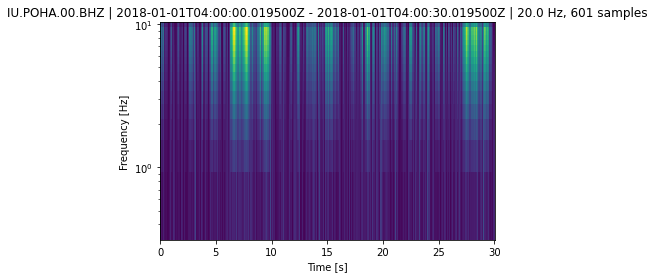

[None]

In [36]:
st_hour.spectrogram(log=True)

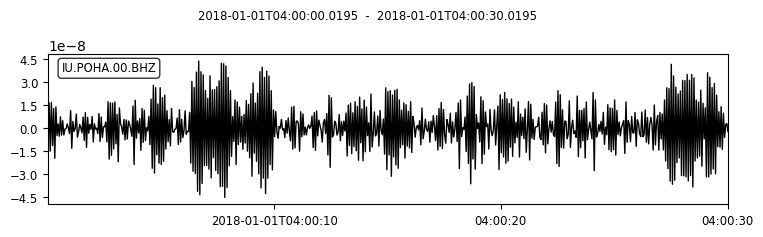

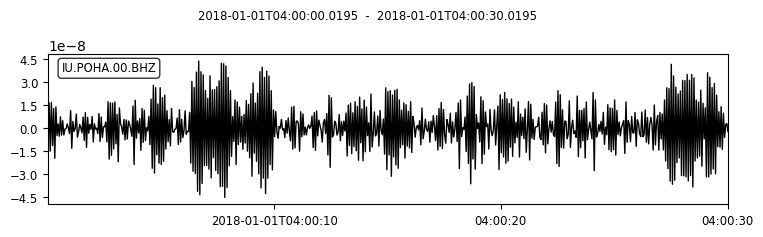

In [37]:
st_short_filt = st_hour.filter('highpass', freq=2, corners=2, zerophase=True)
st_short_filt.plot()